Project: Investigate a Dataset (TMDb Movie Data)
    



Table of Contents

1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions


INTRODUCTION:

I choose TMDb Movie Data Set to for Data Analysis. 
This Data Set contains more than 1000 records and 21 columns. 
And it includes information about budget, revenue, runtime, casting, director, genres, release_year, popularity of the movies, viewer's rating, production company and others.
This Data Set can help us to understand various factors like trends on genres over years, profitabiliy, top movies over years, average runtime over years, top directors and casts and many more.
Following are the points which colud be analysed using Numpy, Pandas(Series and DataFrame) and Matplotlib.


NOTE: For this analysis, I am not using inferential statistics and machine learning, so findings are tentative.

    
QUESTIONS:
    
    1. Which genre has the highest movies releases?
    
    2. With respect to vote counts
        2.a. Which are the Top 5 Movies ?
        2.b. Who are the Top 5 actors ?
        2.c. Who are the Top 5 directors ?
    
    3. Which movie(s) 
       3.a. Have earned the highest and least profits?
       3.b. Have the highest and least popularity scores?
       3.c. Has the highest and least revenue?
       3.d. Have the highest and least budget?
    
    4. 4.a. Which year has the highest number of movie releases?
       4.b. which year has the highest annual profit?
       4.c. Which year has the highest annual popularity count?
       
    5. 5.a What is Average runtime of all the movies in the data set?
       5.b How does the yearly average movie run time vary over the years in the [1859-2015] ?
    
    6. 6.a. Which acter acted in highest number of films?
       6.b. Which director directed highest number of films?
       
    7. 7.a. Is there a relationship between movie popularity v/s vote_count? 
       7.b. Is there a relationship between movie profit v/s revenue?

In [55]:
# Importing packages Numpy, Pandas and Matplotlib.

import numpy as np
import pandas as pd

from pandas import Series, DataFrame

%matplotlib inline

import matplotlib.pyplot as plt

DATA WRANGLING:

Here we are going to import CSV file and will perform following operations:

    a. Checking head and tail of the data.
    b. Checking size, number of rows, columns.
    c. Checking null values, description and info.

NOTE: Here is the link of the data set.

https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

In [56]:
# Loading the data set.

data = pd.read_csv('tmdb-movies.csv', sep = ',')

In [57]:
# Check data set head.

data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [58]:
# Check data set tail.

data.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [59]:
# Check shape of the data set.

print('This data set contains 10866 rows and 21 columns.', data.shape)
data.shape

This data set contains 10866 rows and 21 columns. (10866, 21)


(10866, 21)

In [60]:
# Check basic information.
# Check columns name.

for ele1, ele2 in enumerate(data.columns):
    print(ele1, ele2)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [61]:
# Check basic information.
# Check any unique values.

data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [62]:
# Check basic information.

data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
# Check with string values.

data.describe(include = 'object')

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/2009
freq,2,4,6,4,45,5,134,13,712,156,28


In [64]:
# Check column name and type.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

OBSERVATIONS:
    
    a. There are  major missing values in 'homepage', 'keywords', 'production_companies', 'taglines'.
    
    b. 'id', 'imdb_id', 'homepage', 'tagline', 'overview' are not relevent for this analysis, so we can drop this columns.
    
    c. 'cast', 'genres', 'director' has multivariables. Need to split this columns.
    
    d. Since there are missing values, needs to fill/drop.
    
    e. 'release_date' is not in proper format. Need to change to datetime format (YYYY/MM/DD).
    

DATA CLEANING:

    STEPS:
          
          a. Dropping not relevent columns.
          b. Dropping rows which have missing values.
          c. Repalcing '0' values with their mean values.
          d. Checking duplicate rows and droping it.
          e. Changing the 'release_date' format to datetime format.

In [65]:
# Drop columns which are not relevent.

drop = ['id', 'imdb_id', 'homepage', 'tagline', 'overview']

data.drop(drop, axis = 1, inplace = True)

print("Droping not relevent columns:", drop)

data.head()

Droping not relevent columns: ['id', 'imdb_id', 'homepage', 'tagline', 'overview']


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [66]:
# Check '0' values.

data.isin([0]).sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [67]:
# Replacing '0' with mean values.

data['budget'] = data['budget'].replace(0,data['budget'].mean())
data['budget_adj'] = data['budget_adj'].replace(0,data['budget_adj'].mean())
data['revenue'] = data['revenue'].replace(0,data['revenue'].mean())
data['revenue_adj'] = data['revenue_adj'].replace(0,data['revenue_adj'].mean())
data['runtime'] = data['runtime'].replace(0,data['runtime'].mean())

In [68]:
# Rechecking '0' values.

data.isin([0]).sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [69]:
# Chech "NAh" mising values.

data.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [70]:
# Droping "NAh" values.

data = data.dropna()

In [71]:
# Rechecking 'NAh' values.

data.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [72]:
# Rechecking the shape.

print(' After droping NAh values, this data set contains 8667 rows and 16 columns.', data.shape)

data.shape

 After droping NAh values, this data set contains 8667 rows and 16 columns. (8667, 16)


(8667, 16)

In [73]:
# Check duplicate values.

sum(data.duplicated())

1

In [74]:
# Drop duplicate value.

data = data.drop_duplicates()

In [75]:
# Rechecking the shape.

print(' After droping duplicate values, this data set contains 8666 rows and 16 columns.', data.shape)

data.shape

 After droping duplicate values, this data set contains 8666 rows and 16 columns. (8666, 16)


(8666, 16)

In [76]:
# Change format.

data['release_date'] = pd.to_datetime(data['release_date'], errors = 'ignore')

In [77]:
# Rechecking column name and type.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 16 columns):
popularity              8666 non-null float64
budget                  8666 non-null float64
revenue                 8666 non-null float64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
runtime                 8666 non-null float64
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null datetime64[ns]
vote_count              8666 non-null int64
vote_average            8666 non-null float64
release_year            8666 non-null int64
budget_adj              8666 non-null float64
revenue_adj             8666 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D86BDD8>,
      dtype=object)

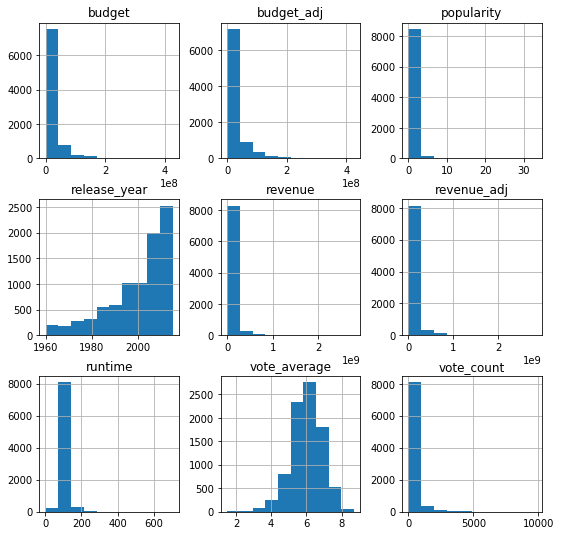

In [78]:
# Ploting histrogram.

data.hist(figsize=(9,9))

By looking at this chart, we can say that movie 'release_year' is increasing over years.
And highest  average 'vote_average' count is between 5-7.

EXPLORATORY DATA ANALYSIS:

    Let's start with exploratory data part.

Question 1:

1. Which genre has the highest movie releases?

In [79]:
# Splitting genres and plotting using bar chart.
# Create function:

def Frequent(name, size):
    new_data = data[name].str.cat(sep ='|').split('|')
    new_data = pd.Series(new_data).value_counts()[:size]
    return new_data

print("Frequently Used Genres In Movies Are: ")

highest = Frequent ('genres', 16)
highest

Frequently Used Genres In Movies Are: 


Drama              3934
Comedy             3050
Thriller           2462
Action             2022
Romance            1415
Horror             1339
Adventure          1271
Crime              1200
Science Fiction    1028
Family              946
Fantasy             763
Mystery             703
Animation           512
Music               309
History             287
Documentary         270
dtype: int64

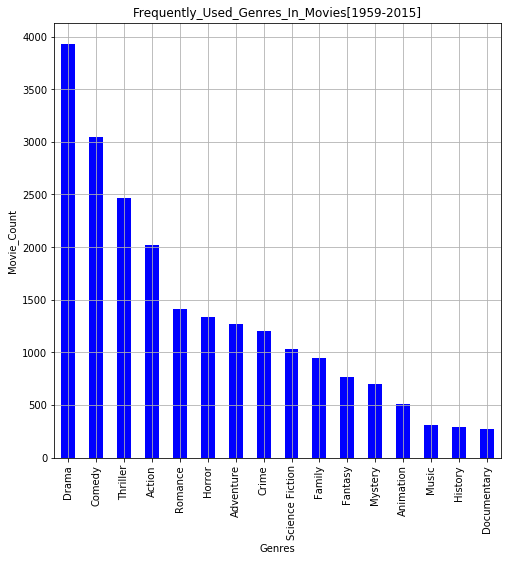

In [80]:
# Plotting using bar chart.

highest.plot(kind='bar', figsize=(8,8), color = 'blue')
plt.title('Frequently_Used_Genres_In_Movies[1959-2015]')
plt.xlabel("Genres") 
plt.ylabel("Movie_Count") 
plt.grid(True)

According to the chart, Drama has the highest number of movies release followed by Comedy and Thriller.

Question 2:

2. With respect to vote counts:

    2.a. Which are the Top 5 Movies ?
    
    2.b. Who are the Top 5 actors ?
    
    2.c. Who are the Top 5 directors ?

In [81]:
print("Top Five Movies, Actor, Director With Respect To Vote_Count Are:")

top_values = data.groupby(['vote_count','original_title','cast', 'director'], as_index=False).mean().sort_values(['vote_count'], ascending = False)[:5]
top_values

Top Five Movies, Actor, Director With Respect To Vote_Count Are:


,vote_count,original_title,cast,director,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
8665,9767,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,9.363643,160000000.0,8.255000e+08,148.0,7.9,2010,1.600000e+08,8.255000e+08
8664,8903,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,7.637767,220000000.0,1.519558e+09,143.0,7.3,2012,2.089437e+08,1.443191e+09
8663,8458,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,9.432768,237000000.0,2.781506e+09,162.0,7.1,2009,2.408869e+08,2.827124e+09
8662,8432,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,8.466668,185000000.0,1.001922e+09,152.0,8.1,2008,1.873655e+08,1.014733e+09
8661,7375,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,5.944518,100000000.0,4.253682e+08,165.0,7.7,2012,9.497443e+07,4.039911e+08


In [82]:
# 2.a. Which are the Top 5 Movies ?

print("TOP 5 Movies With Highest Votes are: ")

top_movie = data.groupby(['vote_count','original_title'], as_index=False).mean().sort_values(['vote_count'], ascending = False)[:5]
top_movie

TOP 5 Movies With Highest Votes are: 


,vote_count,original_title,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
8662,9767,Inception,9.363643,160000000.0,8.255000e+08,148.0,7.9,2010.0,1.600000e+08,8.255000e+08
8661,8903,The Avengers,7.637767,220000000.0,1.519558e+09,143.0,7.3,2012.0,2.089437e+08,1.443191e+09
8660,8458,Avatar,9.432768,237000000.0,2.781506e+09,162.0,7.1,2009.0,2.408869e+08,2.827124e+09
8659,8432,The Dark Knight,8.466668,185000000.0,1.001922e+09,152.0,8.1,2008.0,1.873655e+08,1.014733e+09
8658,7375,Django Unchained,5.944518,100000000.0,4.253682e+08,165.0,7.7,2012.0,9.497443e+07,4.039911e+08


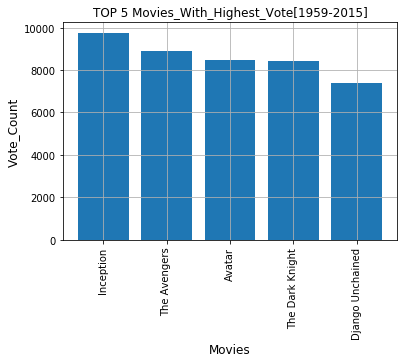

In [83]:
# Plotting TOP 5 Movies With Highest Votes:

plt.bar(top_movie['original_title'], top_movie['vote_count'])
plt.xticks(rotation=90)
plt.title('TOP 5 Movies_With_Highest_Vote[1959-2015]')
plt.xlabel("Movies",fontsize = 12) 
plt.ylabel("Vote_Count",fontsize = 12) 
plt.grid(True)

In [84]:
# 2.b. Who are the Top 5 actors ?

hybrid = data[data['cast'].str.contains('|')]

d = hybrid.copy()  

split_column = ['cast']

for ele in split_column:
    d[ele] = d[ele].apply(lambda x: x.split("|")[0])

print("TOP 5 Actors With Highest Votes are: ")

top_cast = d.groupby(['vote_count','cast'], as_index=False).mean().sort_values(['vote_count'], ascending = False)[:5]
top_cast

TOP 5 Actors With Highest Votes are: 


,vote_count,cast,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
8475,9767,Leonardo DiCaprio,9.363643,160000000.0,8.255000e+08,148.0,7.9,2010.0,1.600000e+08,8.255000e+08
8474,8903,Robert Downey Jr.,7.637767,220000000.0,1.519558e+09,143.0,7.3,2012.0,2.089437e+08,1.443191e+09
8473,8458,Sam Worthington,9.432768,237000000.0,2.781506e+09,162.0,7.1,2009.0,2.408869e+08,2.827124e+09
8472,8432,Christian Bale,8.466668,185000000.0,1.001922e+09,152.0,8.1,2008.0,1.873655e+08,1.014733e+09
8471,7375,Jamie Foxx,5.944518,100000000.0,4.253682e+08,165.0,7.7,2012.0,9.497443e+07,4.039911e+08


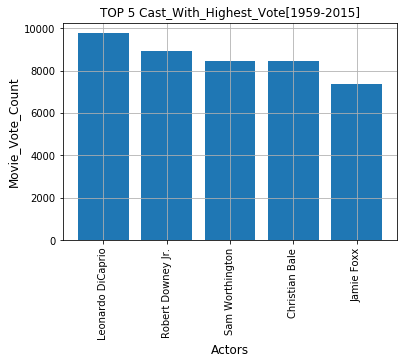

In [85]:
# Plotting TOP 5 Actors With Highest Votes:

plt.bar(top_cast['cast'], top_cast['vote_count'])
plt.xticks(rotation=90)
plt.title('TOP 5 Cast_With_Highest_Vote[1959-2015]')
plt.xlabel("Actors",fontsize = 12) 
plt.ylabel("Movie_Vote_Count",fontsize = 12) 
plt.grid(True)

In [86]:
# 2.c. Who are the Top 5 directors ?

print("TOP 5 Directors With Highest Votes are: ")

top_director = data.groupby(['vote_count','director'], as_index=False).mean().sort_values(['vote_count'], ascending = False)[:6]
top_director

TOP 5 Directors With Highest Votes are: 


,vote_count,director,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
8521,9767,Christopher Nolan,9.363643,160000000.0,8.255000e+08,148.0,7.9,2010.0,1.600000e+08,8.255000e+08
8520,8903,Joss Whedon,7.637767,220000000.0,1.519558e+09,143.0,7.3,2012.0,2.089437e+08,1.443191e+09
8519,8458,James Cameron,9.432768,237000000.0,2.781506e+09,162.0,7.1,2009.0,2.408869e+08,2.827124e+09
8518,8432,Christopher Nolan,8.466668,185000000.0,1.001922e+09,152.0,8.1,2008.0,1.873655e+08,1.014733e+09
8517,7375,Quentin Tarantino,5.944518,100000000.0,4.253682e+08,165.0,7.7,2012.0,9.497443e+07,4.039911e+08
8516,7080,Gary Ross,2.571099,75000000.0,6.912107e+08,142.0,6.7,2012.0,7.123082e+07,6.564734e+08


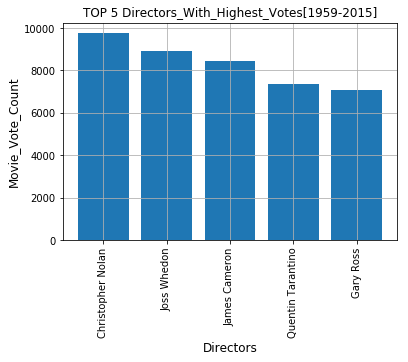

In [87]:
# Plotting TOP 5 Directors With Highest Votes:

plt.bar(top_director['director'], top_director['vote_count'])
plt.xticks(rotation=90)
plt.title('TOP 5 Directors_With_Highest_Votes[1959-2015]')
plt.xlabel("Directors",fontsize = 12) 
plt.ylabel("Movie_Vote_Count",fontsize = 12) 
plt.grid(True)

Question 3:

3. Which movie(s):

   3.a. Have earned the highest and least profits?
   
   3.b. Have the highest and least popularity scores?
   
   3.c. Has the highest and least revenue?
   
   3.d. Have the highest and least budget?

In [88]:
# To find highest and lowest profit, need to calculate profit first. 
# For profit =  revenue - budget.

data['profit'] = data['revenue'] - data['budget']
data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.316249e+09


In [89]:
# Create function to calculate highest and lowest profit, popularity, revenue and budget.

def HighLow(ele):
    high = data[ele].max()
    high = pd.DataFrame(data[data[ele] == high])
    
    low = data[ele].min()
    low = pd.DataFrame(data[data[ele] == low])
    
    table = high.append(low, ignore_index=True)
    
    return table

In [90]:
# 3.a. Have earned the highest and lowest profits?

print("Movie with highest profit: AVATAR and Movie with lowest profit: THE WARRIOR'S WAY.")

h_l_profit = HighLow('profit')
h_l_profit

Movie with highest profit: AVATAR and Movie with lowest profit: THE WARRIOR'S WAY.


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09,2.544506e+09
1,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,1.108757e+07,-4.139124e+08


(array([0, 1]), <a list of 2 Text xticklabel objects>)

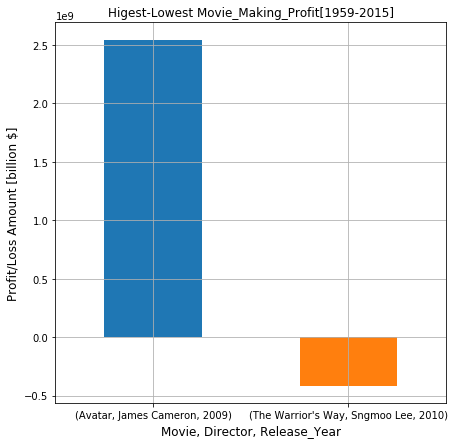

In [91]:
# Plotting highest and lowest movie making profit.

h_l_profit.groupby(['original_title', 'director', 'release_year'])['profit'].sum().plot(kind = 'bar', figsize=(7,7))
plt.title('Higest-Lowest Movie_Making_Profit[1959-2015]')
plt.xlabel("Movie, Director, Release_Year",fontsize = 12) 
plt.ylabel("Profit/Loss Amount [billion $]",fontsize = 12) 
plt.grid(True)
plt.xticks(rotation=0)

In [92]:
# 3.b. Have the highest and lowest popularity scores?
# Use same function:

print("Movie with highest popularity: JURASSIC WORLD and Movie with lowest popularity: THE HOSPITAL.")

h_l_profit = HighLow('popularity')
h_l_profit

Movie with highest popularity: JURASSIC WORLD and Movie with lowest popularity: THE HOSPITAL.


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,0.000188,1.462570e+07,3.982332e+07,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,hospital|malpratice,103.0,Mystery|Comedy|Drama,Simcha Productions,1971-12-14,10,6.4,1971,1.755104e+07,5.136436e+07,2.519762e+07


(array([0, 1]), <a list of 2 Text xticklabel objects>)

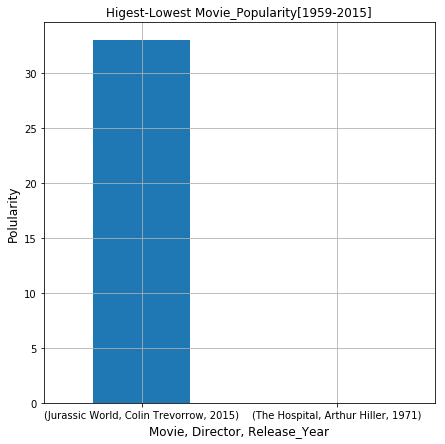

In [93]:
# Plotting highest and lowest movie popularity.

h_l_profit.groupby(['original_title', 'director', 'release_year'])['popularity'].mean().plot(kind = 'bar', figsize=(7,7))
plt.title('Higest-Lowest Movie_Popularity[1959-2015]')
plt.xlabel("Movie, Director, Release_Year",fontsize = 12) 
plt.ylabel("Polularity",fontsize = 12) 
plt.grid(True)
plt.xticks(rotation=0)

In [94]:
# 3.c. Has the highest and lowest revenue?
# Use same function:

print("Movie with highest revenue: AVATAR and Movie with lowest revenue: MALLRATS.")

h_l_profit = HighLow('revenue')
h_l_profit    

Movie with highest revenue: AVATAR and Movie with lowest revenue: MALLRATS.


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
1,0.552091,6000000.0,2.000000e+00,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,sex|game show|slacker|comic|shopping,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934e+00,-5.999998e+06


(array([0, 1]), <a list of 2 Text xticklabel objects>)

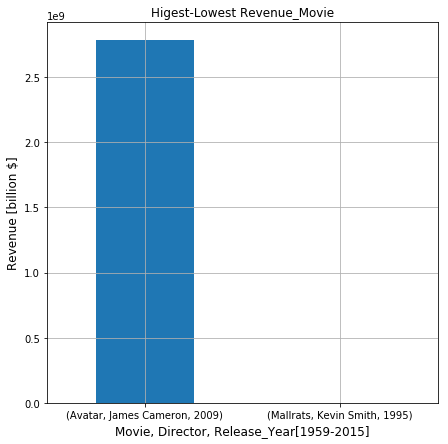

In [95]:
# Plotting highest and lowest movie revenue.

h_l_profit.groupby(['original_title', 'director', 'release_year'])['revenue'].mean().plot(kind = 'bar', figsize=(7,7))
plt.title('Higest-Lowest Revenue_Movie')
plt.xlabel("Movie, Director, Release_Year[1959-2015]",fontsize = 12) 
plt.ylabel("Revenue [billion $]",fontsize = 12) 
plt.grid(True)
plt.xticks(rotation=0)

In [96]:
# 3.d. Have the highest and lowest budget?
# Use same function:

print("Movie with highest budget: THE WARRIOR'S WAY and Movie with lowest budget: LOST AND FOUND, FEAR CLINIC AND ANGUS,THONGS AND PERFECT SNOGGING.")

h_l_profit = HighLow('budget')
h_l_profit    

Movie with highest budget: THE WARRIOR'S WAY and Movie with lowest budget: LOST AND FOUND, FEAR CLINIC AND ANGUS,THONGS AND PERFECT SNOGGING.


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
1,0.177102,1.0,3.982332e+07,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,phobia|doctor|fear,95.0,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,2014-10-31,15,4.1,2014,9.210911e-01,5.136436e+07,3.982332e+07
2,0.090186,1.0,1.000000e+02,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,restaurant|neighbor|dog|ring,95.0,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1.309053e+00,1.309053e+02,9.900000e+01
3,0.472691,1.0,3.982332e+07,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,adolescence|parents kids relationship|becoming...,100.0,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,2008-07-25,146,6.5,2008,1.012787e+00,5.136436e+07,3.982332e+07
4,0.520430,1.0,1.378000e+03,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,wedding vows|marriage|love,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,9.693980e-01,1.335831e+03,1.377000e+03


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

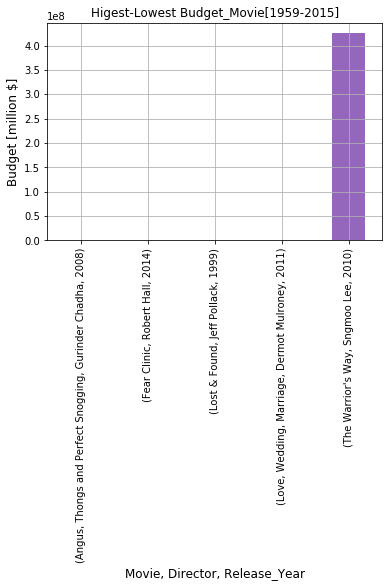

In [97]:
# Plotting highest and lowest movie budget.

h_l_profit.groupby(['original_title', 'director', 'release_year'])['budget'].mean().plot(kind = 'bar')
plt.title('Higest-Lowest Budget_Movie[1959-2015]')
plt.xlabel("Movie, Director, Release_Year",fontsize = 12) 
plt.ylabel("Budget [million $]",fontsize = 12) 
plt.grid(True)
plt.xticks(rotation=90)

Research Question 4:

4. 4.a. Which year has the highest number of movie releases?

   4.b. which year has the highest annual profit?
   
   4.c. Which year has the highest annual popularity count?

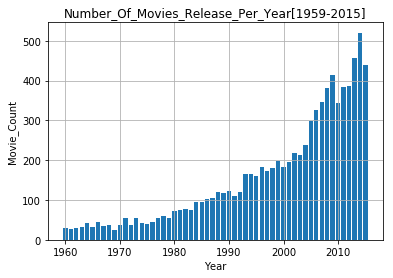

In [98]:
# 4.a. Which year has the highest number of movie releases?

high_movie = data.groupby(['release_year'],as_index=False)['original_title'].count()

plt.bar(high_movie['release_year'], high_movie['original_title']) 
plt.title("Number_Of_Movies_Release_Per_Year[1959-2015]") 
plt.xlabel("Year") 
plt.ylabel("Movie_Count") 
plt.grid(True)

According to the chart, in the year 2014 has the highest number of movies released follwed by 2013. 

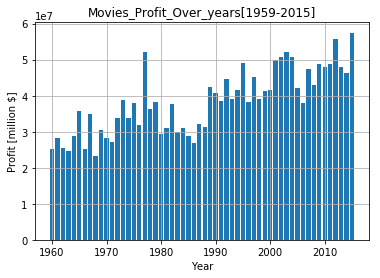

In [99]:
# 4.b. which year has the highest annual profit?

high_profit = data.groupby(['release_year'],as_index=False)['profit'].mean()

plt.bar(high_profit['release_year'], high_profit['profit']) 
plt.title("Movies_Profit_Over_years[1959-2015]") 
plt.xlabel("Year") 
plt.ylabel("Profit [million $]") 
plt.grid(True)

According to the chart, in the year 2015 has the highest profit followed by 2012.

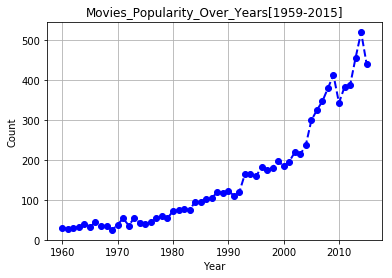

In [100]:
# 4.c. Which year has the highest annual popularity count?

high_popularity = data.groupby(['release_year'],as_index=False)['popularity'].count()

plt.plot(high_popularity['release_year'],high_popularity['popularity'],'bo--', linewidth = 2) 
plt.title("Movies_Popularity_Over_Years[1959-2015]") 
plt.xlabel("Year") 
plt.ylabel("Count") 
plt.grid(True)

According to the chart, in the year 2015 has the highest popularity for movies followed by 2014.

Question 5:

5. 5.a What is Average runtime of all the movies in the data set?

   5.b How does the yearly average movie run time vary over the years in the [1859-2015] ?

The average mean runtime is: 103.89758781937479


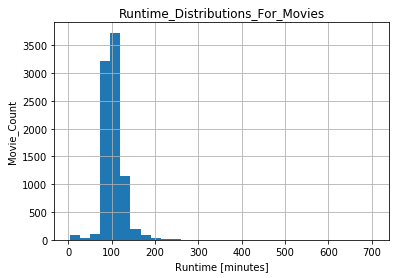

In [101]:
# 5.a What is Average runtime of all the movies in the data set?
# To check average, need t calculate average_mean.

avg_mean = data['runtime'].mean()

print('The average mean runtime is:', avg_mean)

plt.hist(data['runtime'], bins = 30)
plt.title('Runtime_Distributions_For_Movies')
plt.xlabel("Runtime [minutes]")
plt.ylabel("Movie_Count")
plt.grid(True)

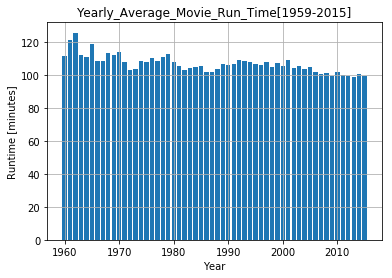

In [102]:
# 5.b How does the yearly average movie run time vary over the years in the [1959-2015] ?

high_runtime = data.groupby(['release_year'],as_index=False)['runtime'].mean()

plt.bar(high_runtime['release_year'], high_runtime['runtime']) 
plt.title("Yearly_Average_Movie_Run_Time[1959-2015]") 
plt.xlabel("Year") 
plt.ylabel("Runtime [minutes]") 
plt.grid(True)

According to chart, the average runtime has slightly decreasing over years.

Question 6:

6. 6.a. Which acter acted in highest number of films?

   6.b. Which director directed highest number of films?

In [103]:
#  6.a. Which acter acted in highest number of films? 
# Create function:

def Frequent(name, size):
    new_data = data[name].str.cat(sep ='|').split('|')
    new_data = pd.Series(new_data).value_counts()[:size]
    return new_data

print('The Top Five Actors are:')

freq_cast = Frequent ('cast', 5)
freq_cast

The Top Five Actors are:


Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Michael Caine        50
dtype: int64

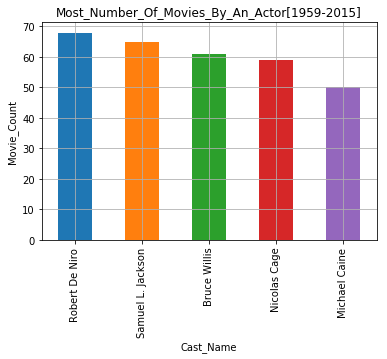

In [104]:
#Plotting acter acted in highest number of films.

freq_cast.plot(kind='bar')
plt.title('Most_Number_Of_Movies_By_An_Actor[1959-2015]')
plt.xlabel("Cast_Name") 
plt.ylabel("Movie_Count") 
plt.grid(True)

In [105]:
# 6.b. Which director directed highest number of films?
# Use same function:

print('The Top Five Directors are:')

freq_director = Frequent ('director', 5)
freq_director

The Top Five Directors are:


Woody Allen         41
Clint Eastwood      33
Steven Spielberg    30
Martin Scorsese     27
Ridley Scott        23
dtype: int64

Text(0,0.5,'Director_Name')

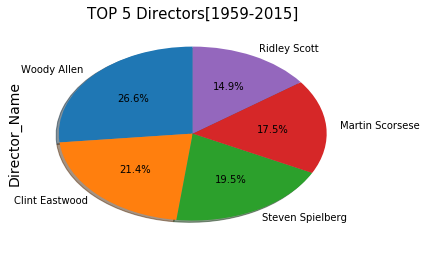

In [106]:
# Plotting director directed highest number of films.

freq_director.plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('TOP 5 Directors[1959-2015]',fontsize = 15)
plt.ylabel('Director_Name',fontsize = 14)

Question 7:

7. 7.a. Is there a relationship between movie popularity v/s vote_count?

   7.b. Is there a relationship between movie profit v/s revenue?

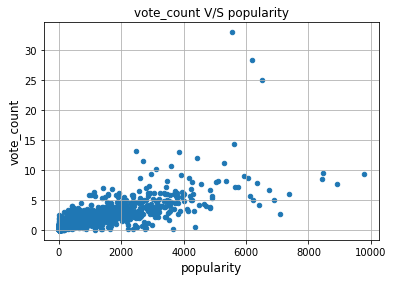

In [107]:
# 7.a. Is there a relationship between movie popularity v/s vote_count?

data.plot(kind = 'scatter', x = 'vote_count', y = 'popularity')
plt.title('vote_count V/S popularity')
plt.ylabel("vote_count",fontsize = 12) 
plt.xlabel("popularity",fontsize = 12) 
plt.grid(True)

According to chart, there is no relationship between popularity Vs vote_count. As popularity increases, Vote_count is not increasing. 

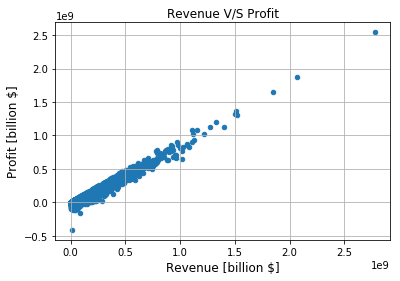

In [108]:
# 7.b. Is there a relationship between movie profit v/s revenue?

data.plot(kind = 'scatter', y = 'profit', x = 'revenue')
plt.title('Revenue V/S Profit')
plt.ylabel("Profit [billion $]",fontsize = 12) 
plt.xlabel("Revenue [billion $]", fontsize = 12) 
plt.grid(True)

According to chart, YES there is a relationship between revenue Vs profit. As revenue increases, profit also increased.

CONCLUSION:
    
Limitations:

The above observations may not be accurate. As I am not using statistical methods and machine learning, further analysis is required for accurate information.

1. Some rows are deleted from data set, due to NAh or missing values. This may effect the analysis.

2. Some columns also deleted from data set, thought not relevent for my analysis. This may effect the analysis too.

    In this project, I have analysied general trends in movies.
    
    And these observations are tentative, not verified by principles of statistics and machine learning.
    
ACCORDING TO MY ANALYSIS:
    
    1. Drama has the highest number of movies release followed by Comedy and Thriller.
    
    2. Inception is the most voted movie, Leonardo DiCaprio is the most voted actor and Christopher Nolan is the most voted director.
    
    3. AVATAR is highest profit earned movie and THE WARRIOR'S WAY is the lowest profit earned movie.
    
    4. Highest number of movies released in 2014, highest popularity in 2015 and highest profit earned in 2015 followed by 2012.
    
    5. The average mean runtime is: 103.89758781937479 by the time of analysis.
        
    6. ROBERT DE NIRO is the actor who acted highest number of movies and WOODY ALLEN is the director who directed highest number of movies.
    
    7. There is a relation between revenue and profit. As revenue increases, profit also increases.